In [1]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from utils import get_tree_from,get_region_name_list, get_level_id_list, color_map, write_json,get_dict

df_signal = pd.read_csv('../../assets/brain205_signal_region316.csv',usecols=list(range(1,316)),index_col='brain')
df_signal = df_signal.sort_index()
df_signal.columns = df_signal.columns.astype(int)
df_signal

,1,4,7,12,15,19,23,27,30,35,...,563807439,576073699,576073704,589508447,589508451,589508455,599626923,599626927,606826663,607344830
brain,,,,,,,,,,,,,,,,,,,,,
15257,138089,284546,345408,31220,67649,219228,996822,2008,72390,2096,...,584,43099,829648,19828,62674,3121,5666,818,1004,4466
17051,0,1971,300,0,0,0,566,0,279,0,...,7,0,0,35,0,0,0,0,0,0
17052,0,366799,43068,0,0,0,0,0,0,0,...,0,0,0,0,0,55080,0,51,0,0
17109,9518,2608961,793668,15066,37332,38946,136967,18046,7289,10022,...,4547,8170,22586,216228,16395,20403,284,8701,3392,13159
17298,4701,2098221,204058,23049,23400,30099,121026,17020,2701,9550,...,3993,5534,57918,26644,5127,58531,542,4382,1361,4632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211807,157,2065,5271,487,2780,26,26073,223,131,302,...,0,4625,26072,0,566,196,0,0,26,1462
236174,2004,212118,31311,9977,3882,8444,18982,5910,5142,434,...,1488,913,4826,17457,1186,361,147,2446,2048,338
A3_16um_final,19685,98133,7619,9855,1524826,98752,14607,104,448425,1655,...,1225,26105,2567787,3591,1114,38204,1635,13,1499,247


In [2]:
level = 316
uint = 32
n316_u32_voxel_dict = get_dict(level,uint,key='voxel')
voxel_list = [[n316_u32_voxel_dict[int(i)] if int(i) in n316_u32_voxel_dict else float('inf')][0] for i in df_signal.columns]
df_signal = pd.DataFrame(df_signal.values/voxel_list,columns=df_signal.columns,index=df_signal.index)
df_signal.columns = df_signal.columns.astype(int)
df_signal

,1,4,7,12,15,19,23,27,30,35,...,563807439,576073699,576073704,589508447,589508451,589508455,599626923,599626927,606826663,607344830
brain,,,,,,,,,,,,,,,,,,,,,
15257,19.923388,0.999807,4.911456,5.616118,4.600095,27.548128,31.493176,0.454813,22.685678,1.005758,...,0.403315,13.426480,60.434732,0.734534,9.549596,0.572555,6.260773,0.267146,0.979512,3.176387
17051,0.000000,0.006925,0.004266,0.000000,0.000000,0.000000,0.017882,0.000000,0.087433,0.000000,...,0.004834,0.000000,0.000000,0.001297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17052,0.000000,1.288818,0.612396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.104568,0.000000,0.016656,0.000000,0.000000
17109,1.373251,9.167083,11.285395,2.710200,2.538556,4.893943,4.327278,4.087429,2.284237,4.809021,...,3.140193,2.545171,1.645251,8.010224,2.498095,3.742983,0.313812,2.841607,3.309268,9.359175
17298,0.678257,7.372500,2.901560,4.146249,1.591187,3.782232,3.823645,3.855040,0.846443,4.582534,...,2.757597,1.723988,4.218969,0.987034,0.781198,10.737663,0.598895,1.431091,1.327805,3.294452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211807,0.022652,0.007256,0.074950,0.087606,0.189038,0.003267,0.823739,0.050510,0.041053,0.144914,...,0.000000,1.440810,1.899184,0.000000,0.086241,0.035957,0.000000,0.000000,0.025366,1.039829
236174,0.289136,0.745317,0.445220,1.794747,0.263974,1.061071,0.599709,1.338618,1.611407,0.208253,...,1.027624,0.284424,0.351544,0.646699,0.180710,0.066226,0.162431,0.798824,1.998049,0.240398
A3_16um_final,2.840139,0.344809,0.108337,1.772801,103.687339,12.409148,0.461487,0.023556,140.528048,0.794146,...,0.845994,8.132399,187.047421,0.133030,0.169739,7.008622,1.806630,0.004246,1.462439,0.175676


In [3]:
level = 13
structure_list = get_level_id_list(df_signal.columns.tolist(),level)
write_json([int(i) for i in structure_list],'../../assets/structure_list.json')
structure_list

[1097,
 313,
 771,
 313,
 549,
 1089,
 477,
 549,
 1097,
 313,
 1097,
 315,
 315,
 315,
 477,
 313,
 549,
 1097,
 549,
 313,
 1097,
 313,
 354,
 1097,
 519,
 354,
 313,
 354,
 315,
 354,
 315,
 313,
 1097,
 315,
 1097,
 549,
 313,
 703,
 1097,
 354,
 354,
 771,
 771,
 549,
 698,
 549,
 698,
 771,
 354,
 549,
 1097,
 354,
 549,
 549,
 315,
 549,
 549,
 1097,
 313,
 354,
 354,
 354,
 354,
 354,
 1097,
 313,
 313,
 354,
 549,
 354,
 1097,
 354,
 1097,
 354,
 313,
 354,
 771,
 313,
 477,
 549,
 477,
 549,
 1097,
 477,
 313,
 1097,
 771,
 1097,
 803,
 477,
 313,
 703,
 803,
 313,
 354,
 477,
 771,
 703,
 549,
 549,
 315,
 1097,
 477,
 315,
 1097,
 803,
 315,
 1097,
 771,
 803,
 315,
 1097,
 771,
 315,
 549,
 1097,
 549,
 315,
 354,
 313,
 315,
 313,
 1089,
 315,
 1097,
 315,
 771,
 315,
 477,
 315,
 549,
 315,
 549,
 1089,
 315,
 354,
 354,
 354,
 1097,
 313,
 1089,
 1097,
 549,
 549,
 1097,
 1089,
 698,
 1097,
 1097,
 1097,
 313,
 315,
 771,
 477,
 315,
 803,
 698,
 771,
 549,
 354,
 313,


In [4]:
df_signal_new = df_signal.copy()
df_signal_new.columns = get_region_name_list(df_signal.columns.astype(int).tolist(),32)
df_signal_new

,TMv,IC,PSV,IF,PT,IG,AAA,IGL,PVa,III,...,IntG,VMPO,PeF,HATA,Pa5,VeCB,SCO,PDTg,Pa4,PN
brain,,,,,,,,,,,,,,,,,,,,,
15257,19.923388,0.999807,4.911456,5.616118,4.600095,27.548128,31.493176,0.454813,22.685678,1.005758,...,0.403315,13.426480,60.434732,0.734534,9.549596,0.572555,6.260773,0.267146,0.979512,3.176387
17051,0.000000,0.006925,0.004266,0.000000,0.000000,0.000000,0.017882,0.000000,0.087433,0.000000,...,0.004834,0.000000,0.000000,0.001297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17052,0.000000,1.288818,0.612396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.104568,0.000000,0.016656,0.000000,0.000000
17109,1.373251,9.167083,11.285395,2.710200,2.538556,4.893943,4.327278,4.087429,2.284237,4.809021,...,3.140193,2.545171,1.645251,8.010224,2.498095,3.742983,0.313812,2.841607,3.309268,9.359175
17298,0.678257,7.372500,2.901560,4.146249,1.591187,3.782232,3.823645,3.855040,0.846443,4.582534,...,2.757597,1.723988,4.218969,0.987034,0.781198,10.737663,0.598895,1.431091,1.327805,3.294452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211807,0.022652,0.007256,0.074950,0.087606,0.189038,0.003267,0.823739,0.050510,0.041053,0.144914,...,0.000000,1.440810,1.899184,0.000000,0.086241,0.035957,0.000000,0.000000,0.025366,1.039829
236174,0.289136,0.745317,0.445220,1.794747,0.263974,1.061071,0.599709,1.338618,1.611407,0.208253,...,1.027624,0.284424,0.351544,0.646699,0.180710,0.066226,0.162431,0.798824,1.998049,0.240398
A3_16um_final,2.840139,0.344809,0.108337,1.772801,103.687339,12.409148,0.461487,0.023556,140.528048,0.794146,...,0.845994,8.132399,187.047421,0.133030,0.169739,7.008622,1.806630,0.004246,1.462439,0.175676


In [5]:
df_signal_new = df_signal_new.div(df_signal_new.sum(axis=1), axis=0)
print(df_signal_new.sum(axis=1))
df_signal_new

brain
15257                1.0
17051                1.0
17052                1.0
17109                1.0
17298                1.0
                    ... 
211807               1.0
236174               1.0
A3_16um_final        1.0
AVP-IHC-A2_16um      1.0
AZ10_SR3B_6_A_647    1.0
Length: 193, dtype: float64


,TMv,IC,PSV,IF,PT,IG,AAA,IGL,PVa,III,...,IntG,VMPO,PeF,HATA,Pa5,VeCB,SCO,PDTg,Pa4,PN
brain,,,,,,,,,,,,,,,,,,,,,
15257,0.006047,0.000303,0.001491,0.001705,0.001396,0.008361,0.009559,0.000138,0.006886,0.000305,...,0.000122,0.004075,0.018343,0.000223,0.002898,0.000174,0.001900,8.108415e-05,0.000297,0.000964
17051,0.000000,0.001112,0.000685,0.000000,0.000000,0.000000,0.002871,0.000000,0.014037,0.000000,...,0.000776,0.000000,0.000000,0.000208,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
17052,0.000000,0.002949,0.001401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023119,0.000000,3.810748e-05,0.000000,0.000000
17109,0.000853,0.005694,0.007009,0.001683,0.001577,0.003040,0.002688,0.002539,0.001419,0.002987,...,0.001950,0.001581,0.001022,0.004975,0.001552,0.002325,0.000195,1.764917e-03,0.002055,0.005813
17298,0.000481,0.005233,0.002060,0.002943,0.001129,0.002685,0.002714,0.002736,0.000601,0.003253,...,0.001957,0.001224,0.002995,0.000701,0.000555,0.007622,0.000425,1.015828e-03,0.000943,0.002338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211807,0.000283,0.000090,0.000935,0.001093,0.002358,0.000041,0.010274,0.000630,0.000512,0.001807,...,0.000000,0.017970,0.023686,0.000000,0.001076,0.000448,0.000000,0.000000e+00,0.000316,0.012969
236174,0.001562,0.004026,0.002405,0.009695,0.001426,0.005732,0.003240,0.007231,0.008705,0.001125,...,0.005551,0.001536,0.001899,0.003493,0.000976,0.000358,0.000877,4.315173e-03,0.010793,0.001299
A3_16um_final,0.000323,0.000039,0.000012,0.000202,0.011807,0.001413,0.000053,0.000003,0.016002,0.000090,...,0.000096,0.000926,0.021299,0.000015,0.000019,0.000798,0.000206,4.834434e-07,0.000167,0.000020


# intra-structure-region-consistency-on-regional-distri-corr

314 {'TMv': 'HY', 'IC': 'MB', 'PSV': 'P', 'IF': 'MB', 'PT': 'TH', 'IG': 'HPF', 'AAA': 'STR', 'IGL': 'TH', 'PVa': 'HY', 'III': 'MB', 'PVH': 'HY', 'ACAd': 'Isocortex', 'ILA': 'Isocortex', 'ACAv': 'Isocortex', 'ACB': 'STR', 'MT': 'MB', 'IMD': 'TH', 'PVHd': 'HY', 'AD': 'TH', 'LT': 'MB', 'ADP': 'HY', 'DT': 'MB', 'IO': 'MY', 'AHN': 'HY', 'IP': 'CBN', 'DCO': 'MY', 'IPN': 'MB', 'VCO': 'MY', 'AId': 'Isocortex', 'ISN': 'MY', 'AIp': 'Isocortex', 'IV': 'MB', 'PVi': 'HY', 'AIv': 'Isocortex', 'PVp': 'HY', 'AM': 'TH', 'MRN': 'MB', 'LA': 'CTXsp', 'PVpo': 'HY', 'AMB': 'MY', 'IRN': 'MY', 'PRNr': 'P', 'LC': 'P', 'PVT': 'TH', 'AOB': 'OLF', 'LD': 'TH', 'AON': 'OLF', 'LDT': 'P', 'PRP': 'MY', 'LGd': 'TH', 'RCH': 'HY', 'NR': 'MY', 'LGv': 'TH', 'RE': 'TH', 'FRP': 'Isocortex', 'LH': 'TH', 'RH': 'TH', 'LHA': 'HY', 'RL': 'MB', 'MV': 'MY', 'LIN': 'MY', 'RM': 'MY', 'AP': 'MY', 'LAV': 'MY', 'LM': 'HY', 'RN': 'MB', 'APN': 'MB', 'SUV': 'MY', 'LP': 'TH', 'RO': 'MY', 'ARH': 'HY', 'SPIV': 'MY', 'LPO': 'HY', 'RPA': 'MY', 

<ipython-input-6-f216fda6cf17>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1],fontsize=22)


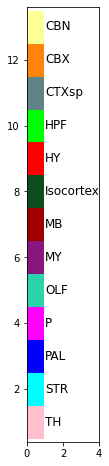

In [6]:
def calc_score(df):
    df_new = df.replace(0, np.nan)
    corr = df_new.corr(min_periods=20, method='spearman')
    corr = corr.fillna(0)
    corr = abs(corr)    
    triu = np.triu(np.ones(corr.shape),1)
    scores = corr.values[triu>0].tolist()
    return scores

#struc_list = ['Isocortex','OLF','HPF','CTXsp','STR','PAL','TH','HY','MB','P','MY','CBX','CBN']
structure_dict = dict(zip(df_signal_new.columns.tolist(),get_region_name_list(structure_list,32)))
print(len(structure_dict),structure_dict)
# color_dict,value_color_dict = color_map(structure_dict,
#             ['khaki1','orange1','darkslategreen1','green',
#              'red','darkgreen','darkred','purple3',
#             'darkseagreen','violet','blue','cyan','pink'])
color_dict,value_color_dict = color_map(structure_dict,
            ['#ffff99','#ff8409','#5f8387','#00ff00',
             'red','#0f4d1f','#9e0000','#87177f',
            '#2bd3ab','magenta','blue','cyan','pink'])
strucs = np.unique(list(structure_dict.values()))
ls = len(strucs)
data = []
fig = plt.figure(figsize=(8,ls))    
for i,struc in enumerate(strucs):
    regions = [k for k,v in structure_dict.items() if v==struc]
    num_regions = len(regions)
    #feature = corr[regions]
    feature = df_signal_new[regions]
    scores = calc_score(feature) 
    data.append(scores)  
    mean = sum(scores)/len(scores)    
    print(i,struc,value_color_dict[struc],len(regions),len(scores))
    ax = fig.add_subplot(ls,1,i+1)
    sns.boxplot(scores,fliersize=1,orient='h',color=value_color_dict[struc],ax=ax)            
    ax.text(mean,0.65,round(mean,2),va='center',ha='center',fontsize=22)   
    
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([-1,1])
    ax.set_yticks([])
    ax.set_ylabel(f'{struc}    ',fontsize=22,rotation=0,va='center')
    ax.set_xlim([0,1])   
    ax.set_xlabel('')
    if i!=len(strucs)-1:
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([]) 
    else:
        ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1],fontsize=22)  
        
plt.subplots_adjust(hspace=0,left=0.5,right=0.99)
plt.savefig(f'../plots/intra-structure-region-consistency-on-regional-distri-corr.png',dpi=300)  
plt.close()

fig = plt.figure(figsize=(1,8)) 
for i,struc in enumerate(strucs):
    plt.scatter(x=[0],y=[13-i],s=1000,marker='s',color=value_color_dict[struc])
    plt.text(1,13-i,struc,ha='left',va='center',fontsize=12)
plt.xlim([0,4])
plt.subplots_adjust(hspace=0,left=0,right=1)
plt.savefig(f'../plots/structure_cbar.png',dpi=300)  


# form single region module

In [7]:
df_corr = df_signal_new.replace(0, np.nan)
corr = df_corr.corr(min_periods=20, method='spearman')
corr = corr.round(6)
corr = corr.fillna(0)
corr.columns = corr.columns.astype(str)
corr.index = corr.index.astype(str)
corr.to_csv('../../assets/corr.csv',index=False)
corr

,TMv,IC,PSV,IF,PT,IG,AAA,IGL,PVa,III,...,IntG,VMPO,PeF,HATA,Pa5,VeCB,SCO,PDTg,Pa4,PN
TMv,1.000000,-0.242795,0.007135,0.176154,0.135708,0.264763,0.355850,0.090323,0.355885,0.317507,...,0.114142,0.290425,0.399993,0.386995,0.154333,0.080612,0.312592,0.120175,0.242242,0.133748
IC,-0.242795,1.000000,0.257297,0.100055,-0.090473,-0.094915,-0.180887,0.166281,-0.339801,-0.122230,...,0.036874,-0.321002,-0.271744,-0.127627,0.115175,0.353693,-0.298551,0.100129,-0.167489,0.059646
PSV,0.007135,0.257297,1.000000,0.225389,-0.350342,0.150770,0.114547,-0.104423,-0.135408,0.430850,...,-0.057131,-0.159213,0.001684,-0.227367,0.566665,0.236350,0.056046,0.361738,0.167662,0.280919
IF,0.176154,0.100055,0.225389,1.000000,0.175277,0.110731,0.302669,0.019982,0.080264,0.388583,...,0.137131,0.006094,0.253812,0.200922,-0.006250,-0.176788,0.154976,0.332643,0.307748,0.541322
PT,0.135708,-0.090473,-0.350342,0.175277,1.000000,0.057423,0.127316,0.279041,0.439676,0.106519,...,0.145254,0.348249,0.345326,0.279273,-0.296479,-0.237694,0.251282,0.095932,0.327687,0.020110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VeCB,0.080612,0.353693,0.236350,-0.176788,-0.237694,-0.113307,-0.184143,-0.056798,-0.285926,-0.095830,...,-0.035275,-0.225716,-0.271274,-0.262161,0.316517,1.000000,-0.058123,0.132614,-0.181572,-0.094990
SCO,0.312592,-0.298551,0.056046,0.154976,0.251282,0.325596,0.377173,-0.071329,0.231149,0.362222,...,0.012423,0.134232,0.338401,0.144022,0.125689,-0.058123,1.000000,0.197682,0.298734,0.186373
PDTg,0.120175,0.100129,0.361738,0.332643,0.095932,0.061899,0.012661,-0.132009,0.084416,0.320992,...,-0.098726,-0.052883,0.049164,-0.014254,0.290334,0.132614,0.197682,1.000000,0.313757,0.232636
Pa4,0.242242,-0.167489,0.167662,0.307748,0.327687,0.223289,0.237628,0.044859,0.183755,0.554358,...,0.070575,0.056366,0.297634,0.271482,0.056322,-0.181572,0.298734,0.313757,1.000000,0.299045


In [8]:
score_thresh = 0.8
regions = corr.index.tolist()
is_region = []
cs_region = []
ir = 0
for region in regions:
    th = score_thresh#np.percentile(abs(corr[region]),96)
    smodule = corr.index[abs(corr[region])>=th].tolist()
    if len(smodule)>1: 
        strucs = set([structure_dict[r] for r in smodule])    
        if len(strucs)==1: 
            is_region.append([region,region])
        else:
            cs_region.append([region,region])
        ir += 1

for pre,regions,w,h,ht,hs in zip(['is','cs'],[is_region,cs_region],[17,17],[6,1],[0.1,0.4],[1.5,0.2]):
    smodules = []
    fig = plt.figure(figsize=(w*1.5,h+1)) 
    iax = 1
    for ir,region in regions:
        color = color_dict[region]
        th = score_thresh#np.percentile(abs(corr[region]),96)
        smodule = corr.index[abs(corr[region])>=th].tolist()
        if len(smodule)==1: raise
        smodules.append([ir,smodule])   
        df_smodule = df_signal_new[smodule] 
        scores = calc_score(df_smodule)
        mean = sum(scores)/len(scores)  
        print(ir,region,color,smodule,len(scores),mean) 

        ax = fig.add_subplot(h,w,iax)
        sns.boxplot(scores,fliersize=1,orient='h',color=color,linewidth=0.1,ax=ax)            
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax.set_title(['ITM' if region in is_region else 'CTM'][0]+str(ir))
        ax.set_title(region,fontsize=20)
        ax.set_yticks([])
        #ax.set_ylabel(region)#label,fontsize=24,rotation=45)
        ax.set_ylabel('')
        ax.set_xlim([0,1])
        ax.set_xlabel(str(round(mean,2)),fontsize=20)
        ax.set_xticks([])     
        iax += 1
    plt.subplots_adjust(hspace=hs,wspace=0.2,left=0.05,right=0.95,bottom=ht,top=1-ht)
    plt.savefig(f'../plots/intra-tergetmodules_{pre}.pdf',dpi=600)  
    plt.close()    

    write_json(smodules,f'../../assets/targetmodules_{pre}.txt')
    
    wl = len(smodules)
    hl = max([len(m[1]) for m in smodules])
    df_smodule = pd.DataFrame(np.zeros((hl,wl)),columns=[m[0] for m in smodules])
    for region,smodule in smodules:
        df_smodule[region] = smodule + ['']*(hl-len(smodule))
    df_smodule.to_csv(f'../../assets/targetmodule_{pre}.csv',index=False)

IGL IGL pink ['IGL', 'LGd', 'LGv'] 3 0.824311100292299
ACAd ACAd #0f4d1f ['ACAd', 'MOs'] 1 0.8041024547183562
MT MT #9e0000 ['MT', 'SNc', 'SNr', 'VTA'] 6 0.7916748899908036
AHN AHN red ['AHN', 'MPN', 'MPO'] 3 0.8399818028577949
AIp AIp #0f4d1f ['AIp', 'VISC'] 1 0.8180592448751535
AIv AIv #0f4d1f ['AId', 'AIv'] 1 0.8059300223740303
MRN MRN #9e0000 ['MRN', 'RN'] 1 0.8349253821782864
IRN IRN #87177f ['IRN', 'NR', 'PARN', 'GRN'] 6 0.7861950251566471
PRNr PRNr magenta ['PRNr', 'TRN'] 1 0.833055475466764
LGd LGd pink ['IGL', 'LGd', 'LGv'] 3 0.824311100292299
NR NR #87177f ['IRN', 'NR', 'XII', 'MDRNv'] 6 0.7959070087500875
LGv LGv pink ['IGL', 'LGd', 'LGv'] 3 0.824311100292299
LHA LHA red ['LHA', 'LPO', 'PeF'] 3 0.7828419106737584
MV MV #87177f ['MV', 'SPIV'] 1 0.8750444078717323
RN RN #9e0000 ['MRN', 'RN'] 1 0.8349253821782864
SPIV SPIV #87177f ['MV', 'SPIV'] 1 0.8750444078717323
LPO LPO red ['LHA', 'LPO', 'MPO'] 3 0.793847657319874
RPO RPO magenta ['RPO', 'CS'] 1 0.8317149826437752
RT RT pi

# merge whole brain region modules 

# decode module tree and calc modules

In [9]:
merge = pd.read_csv('merge.csv')
parent_dict = {}
for p,kids in merge.iterrows():
    parent_dict[p] = [k for k in kids]
#print(len(parent_dict),parent_dict )

kid_path_dict = {}
logickids = sum(list(parent_dict.values()),[])
#print(len(logickids),logickids)

order = pd.read_csv('order.csv')
for kid in sum(order.values.tolist(),[]):
    parent = [p for p,k in parent_dict.items() if -kid in k][0]
    kid_path_dict[-kid] = [parent]
    while parent in logickids:
        parent = [p for p,k in parent_dict.items() if parent in k][0]
        kid_path_dict[-kid].append(parent)
print(len(kid_path_dict),kid_path_dict)

314 {-172: [176, 280, 306, 313], -218: [176, 280, 306, 313], -227: [247, 280, 306, 313], -60: [9, 217, 247, 280, 306, 313], -72: [9, 217, 247, 280, 306, 313], -64: [126, 217, 247, 280, 306, 313], -68: [126, 217, 247, 280, 306, 313], -28: [203, 252, 296, 306, 313], -310: [203, 252, 296, 306, 313], -2: [229, 252, 296, 306, 313], -26: [110, 229, 252, 296, 306, 313], -229: [110, 229, 252, 296, 306, 313], -119: [160, 284, 296, 306, 313], -207: [160, 284, 296, 306, 313], -239: [34, 124, 210, 284, 296, 306, 313], -238: [14, 34, 124, 210, 284, 296, 306, 313], -241: [14, 34, 124, 210, 284, 296, 306, 313], -272: [28, 108, 124, 210, 284, 296, 306, 313], -275: [28, 108, 124, 210, 284, 296, 306, 313], -259: [6, 16, 67, 108, 124, 210, 284, 296, 306, 313], -261: [6, 16, 67, 108, 124, 210, 284, 296, 306, 313], -265: [7, 16, 67, 108, 124, 210, 284, 296, 306, 313], -269: [7, 16, 67, 108, 124, 210, 284, 296, 306, 313], -243: [19, 67, 108, 124, 210, 284, 296, 306, 313], -246: [19, 67, 108, 124, 210, 284, 

In [11]:
def get_colorcode16_list(value_list,nc=10,cmap='spring',reverse=True):        
    rgblist = (np.array(sns.color_palette(cmap,nc+1))*255).astype(int)
    if reverse: 
        rgblist = rgblist[nc::-1,:]
    code16_list = ["".join([hex(c)[2:].rjust(2,'0').upper() for c in rgb]) for rgb in rgblist]
    value_code16_list = [code16_list[v] for v in value_list]
    return value_code16_list
colorcode = get_colorcode16_list(list(range(11)),nc=10,cmap='spring',reverse=True)

score_thresh=0.8
region_list = corr.columns.tolist()
k_list = list(kid_path_dict.keys())
path_list = list(kid_path_dict.values())
modules_is = []
modules_cs = []
im = 0
while len(k_list):
    #print('\n',len(k_list),k_list)
    cur_k = k_list[0]
    cur_path = path_list[0]
    dist_n1 = [len(set(cur_path)&set(p)) for p in path_list]
    dist_max = max(dist_n1[1:])  
    nearest_index = (np.nonzero(np.array(dist_n1)>=dist_max)[0]).tolist()
    nearest_k = [k_list[i] for i in nearest_index]
    nearest_region = [region_list[-i-1] for i in nearest_k]        
    feature = corr[nearest_region]
    score = calc_score(feature)
    mean = sum(score)/len(score)  
    print('\ncurrent region',region_list[-cur_k-1],'path length',len(cur_path))
    print('level',dist_max,'regions number',len(nearest_index),nearest_region,mean)        
    while len(nearest_index)<4 or (mean<score_thresh and len(cur_path)-dist_max<2):
        dist_max -= 1
        nearest_index = (np.nonzero(np.array(dist_n1)>=dist_max)[0]).tolist()
        nearest_k = [k_list[i] for i in nearest_index]
        nearest_region = [region_list[-i-1] for i in nearest_k]        
        feature = corr[nearest_region]
        score = calc_score(feature)
        mean = sum(score)/len(score)          
        print('level',dist_max,'regions',len(nearest_k),nearest_region,mean)        
    [k_list.remove(k) for k in nearest_k]
    [path_list.pop(i) for i in sorted(nearest_index,reverse=True)]
    strucs = set([structure_dict[r] for r in nearest_region])
    if len(strucs)==1: modules_is.append([im,nearest_region])
    else: modules_cs.append([im,nearest_region])
    im += 1
    
for pre,module in zip(['is','cs'],[modules_is,modules_cs]):
    write_json(module,f'../../assets/module_{pre}.txt')
    if pre=='is':
        fig = plt.figure(figsize=(18,1)) 
    else:
        fig = plt.figure(figsize=(20,8)) 
    iax = 1
    for im,modules in module:  
        df_module = corr[modules] 
        scores = calc_score(df_module)
        mean = sum(scores)/len(scores) 
        color='#'+colorcode[int(round(min(scores)*10))]
        print(pre,im,modules,len(scores),mean,color) 

        if pre=='is':
            ax = fig.add_subplot(1,8,iax)
        else:
            ax = fig.add_subplot(2,9,iax)
        sns.boxplot(scores,fliersize=1,orient='h',color=color,linewidth=0.1,ax=ax)            
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax.set_title(['IIM' if pre=='is' else 'CIM'][0]+str(im),fontsize=20)
        ax.set_title('IM'+str(im),fontsize=20)
        ax.set_yticks([])
        ax.set_ylabel('')#modules)#label,fontsize=24,rotation=45)
        ax.set_xlim([0,1])
        ax.set_xlabel(str(round(mean,2)),fontsize=20)
        ax.set_xticks([])     
        iax += 1
    plt.subplots_adjust(bottom=0.3,top=0.65,hspace=10,wspace=0.1)
    plt.savefig(f'../plots/intra-module_{pre}.pdf',dpi=600)  
    plt.close()    

    wl = len(module)
    hl = max([len(m[1]) for m in module])
    df_module = pd.DataFrame(np.zeros((hl,wl)),columns=[['IIM' if region in is_region else 'CIM'][0]+str(m[0]) for m in module],index=list(range(hl)))
    for m in module:
        df_module[['IIM' if region in is_region else 'CIM'][0]+str(m[0])] = m[1] + ['']*(hl-len(m[1]))
    df_module.to_csv(f'../../assets/module_{pre}.csv',index=False)





current region CUN path length 4
level 4 regions number 2 ['CUN', 'PB'] 0.9067294209761803
level 3 regions 7 ['CUN', 'PB', 'ECU', 'MV', 'SPIV', 'LAV', 'SUV'] 0.8225680270955239

current region VCO path length 5
level 5 regions number 2 ['VCO', 'VeCB'] 0.7588483245828439
level 4 regions 5 ['VCO', 'VeCB', 'IC', 'DCO', 'LING'] 0.7660195176353058
level 3 regions 23 ['VCO', 'VeCB', 'IC', 'DCO', 'LING', 'ICB', 'y', 'FOTU', 'DEC', 'PYR', 'PFL', 'FL', 'SIM', 'AN', 'PRM', 'COPY', 'UVU', 'NOD', 'CENT', 'CUL', 'IP', 'DN', 'FN'] 0.8071078518863701

current region AVPV path length 6
level 6 regions number 2 ['AVPV', 'OV'] 0.8153783733472886
level 5 regions 7 ['AVPV', 'OV', 'MEPO', 'PVpo', 'VMPO', 'SO', 'VLPO'] 0.7907285082857382
level 4 regions 20 ['AVPV', 'OV', 'MEPO', 'PVpo', 'VMPO', 'SO', 'VLPO', 'AOB', 'MOB', 'SCs', 'NOT', 'IGL', 'LGd', 'IntG', 'APN', 'MPT', 'OP', 'SubG', 'LGv', 'LP'] 0.5950112797095417

current region LH path length 8
level 8 regions number 2 ['LH', 'MH'] 0.8445135039017947
l

cs 12 ['VI', 'B', 'PDTg', 'NTS', 'DMX', 'SUT', 'V', 'PGRNd', 'PARN', 'PC5', 'SOC', 'NTB', 'ISN', 'RPA'] 91 0.8360438678729778 #FF6995
cs 13 ['NLL', 'MEV', 'PCG', 'SG', 'LC', 'SLC', 'SLD', 'CU', 'PAS', 'AP', 'GR', 'x', 'PRP', 'Pa5', 'SPVC', 'SPVI', 'I5', 'PSV', 'SPVO'] 171 0.7707486849074053 #FF9569
cs 14 ['ACVII', 'NR', 'PPY', 'Acs5'] 6 0.8327008548064736 #FF40BF
cs 15 ['LIN', 'PRNc', 'P5', 'MARN', 'PGRNl', 'AMB', 'VII'] 21 0.9189335807431895 #FF2AD5
cs 19 ['PST', 'PSTN', 'RL', 'CLI', 'EW', 'MA3', 'III', 'IV', 'RM', 'PRNr', 'TRN', 'Pa4', 'AT', 'RPO', 'CS', 'VTN', 'DR', 'LDT', 'PAG', 'NI', 'DTN', 'IPN', 'IF', 'PN', 'VM', 'SPFp', 'PoT', 'NB', 'NPC', 'VPMpc', 'PF', 'VPLpc', 'PG', 'LT', 'SAG', 'PBG'] 630 0.6952273689735821 #FFC03F
cs 22 ['ZI', 'PP', 'PIL', 'MT', 'SNc', 'SNr', 'STN', 'CP', 'GPe', 'GPi'] 45 0.8244728278353513 #FF6995
cs 23 ['ACB', 'SI', 'CEA', 'FS'] 6 0.9118025250107401 #FF2AD5
cs 24 ['AON', 'IA', 'BLA', 'EPv'] 6 0.8547837240619235 #FF40BF
cs 25 ['TT', 'ILA', 'DP', 'FC', 'IG

# history

# find projection related module

In [ ]:
import os
import numpy as np
import pandas as pd
from swc_handler import parse_swc
from file_io import load_image
from utils import get_region_name_list

def write_swcobj_fromtrees(obj_des,trees):
    obj = []
    for tree in trees:
        df = pd.DataFrame(tree,columns=['n','t','x','y','z','r','p'])

        f = []
        k = 0
        id2line = {}
        for i in df.index.tolist():
            idx =  df.loc[i,'n']
            k = k+1
            id2line[idx] = str(k)
            s = ['v' ,str(df.loc[i,'x']),str(df.loc[i,'y']),str(df.loc[i,'z'])]
            f.append(s)
        for i in df.index.tolist():
            if df.loc[i, 'p'] not in id2line.keys():
                s = ['p', id2line[df.loc[i,'n']]]
                f.append(s)
                continue
            s = ['l', id2line[df.loc[i,'n']], id2line[df.loc[i, 'p']]]
            f.append(s)

        obj.append(f)

    length = 0
    new_v = []
    new_p = []
    new_l = []
    for f in obj:
        new_length = 0
        for leaf in f:
            if leaf[0]=='v': 
                new_v.append(leaf)
                new_length += 1
            elif leaf[0]=='p': 
                new_p.append(['p',float(leaf[1])+length])
            elif leaf[0]=='l': 
                new_l.append(['l',float(leaf[1])+length,float(leaf[2])+length])
        length += new_length

    with open(obj_des, 'w+') as fp:
        for i,leaf in enumerate(new_v):
            s = f'{leaf[0]} {leaf[1]} {leaf[2]} {leaf[3]}\n'
            fp.writelines(s)
        for i,leaf in enumerate(new_p):
            s = f'{leaf[0]} {leaf[1]}\n'
            fp.writelines(s)  
        for i,leaf in enumerate(new_l):
            s = f'{leaf[0]} {leaf[1]} {leaf[2]}\n'
            fp.writelines(s) 
            
    return 0

def find_u32region_fromregitrees(u32nrrdfile,tree):
    mask = load_image(u32nrrdfile).astype(np.uint32)
    regi_xyz = np.round(np.array(tree)[:,[2,3,4]]).astype(int)
    
    mz,my,mx = mask.shape
    
    regi_xyz_new = regi_xyz.copy()
    regi_xyz_new[:,2][regi_xyz_new[:,2]>=mz] = mz-1
    regi_xyz_new[:,2][regi_xyz_new[:,2]<0] = 0
    regi_xyz_new[:,1][regi_xyz_new[:,1]>=my] = my-1
    regi_xyz_new[:,1][regi_xyz_new[:,1]<0] = 0
    regi_xyz_new[:,0][regi_xyz_new[:,0]>=mx] = mx-1
    regi_xyz_new[:,0][regi_xyz_new[:,0]<0] = 0
    index = (regi_xyz_new[:,2],regi_xyz_new[:,1],regi_xyz_new[:,0])
    u32id_list = mask[index].tolist()
    
    u32id_list = np.array(u32id_list)
    u32id_list[regi_xyz[:,2]>=mz] = 0
    u32id_list[regi_xyz[:,2]<0] = 0
    u32id_list[regi_xyz[:,1]>=my] = 0
    u32id_list[regi_xyz[:,1]<0] = 0
    u32id_list[regi_xyz[:,0]>=mx] = 0
    u32id_list[regi_xyz[:,0]<0] = 0     
    u32id_list = u32id_list.tolist()

    region_list = get_region_name_list(u32id_list,32)
    return u32id_list,region_list

def check_values(raw_list,check_th):
    vs,vcs = np.unique(raw_list,return_counts=True)
    vs = vs.tolist()
    new_vs = vs.copy()
    vcs = vcs.tolist()
    for v,vc in zip(vs,vcs):
        if vc<check_th:
            new_vs.remove(v)
    return new_vs

type_region_dict = {}
ptype_dir = '/media/lyf/Carry/paper/fig1dptype'
ptype_treedir = '/media/lyf/Carry/paper/fig3distance/module/swctree/'
ptype_objdir = '/media/lyf/Carry/paper/fig3distance/module/swcobj/'
level = 316
uint = 32
nrrdfile = f'../../assets/n{level}_u{uint}.nrrd'

In [ ]:
for key in ["RT"]:
    find_str = f'find /media/lyf/Carry/paper/fig1dptype/ | grep -v "all" | grep "{key}" | grep ".swc"'
    value = os.popen(find_str)
    file_list = [i for i in value.read().split('\n') if i]
    print('\n',key)
    for i,ptype_swcfile in enumerate(file_list):
        swcfile = ptype_swcfile.replace(ptype_dir,ptype_treedir+key)
        os.makedirs(os.path.dirname(swcfile),exist_ok=True)
        cp_str = f'cp {ptype_swcfile} {swcfile}'
        os.system(cp_str)

        swctree = parse_swc(swcfile)
        u32id_list,region_list = find_u32region_fromregitrees(nrrdfile,swctree)
        region_list = check_values(region_list,50)
        if i==0:
            region_set = set(region_list)
        else:
            region_set = region_set&set(region_list)
        print(i,len(region_set))
        objfile = ptype_swcfile.replace(ptype_dir,ptype_objdir+key).replace('.swc','.obj')
        os.makedirs(os.path.dirname(objfile),exist_ok=True)
        write_swcobj_fromtrees(objfile, [swctree])

    type_region_dict[key] = region_set
print(type_region_dict)

# history

In [ ]:
# corr0 = df_corr.corr(min_periods=20, method='spearman')
# corr0

In [ ]:
# corr1 = df_corr.corr(min_periods=20, method='spearman')
# corr1[corr1 > 0.8] = 0.8
# corr1

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
# cluster_map = sns.clustermap(corr, figsize=(100,5),# square=True,
#                              yticklabels=False, xticklabels=True, 
#                              col_colors=color_list, colors_ratio=.01,
#                              cmap='coolwarm', 
#                              dendrogram_ratio=.7,
#                              )

# cluster_map.cax.set_visible(False)
# cluster_map.ax_row_dendrogram.set_visible(False)
# cluster_map.ax_col_dendrogram.set_visible(True)
# plt.xticks(labels=None,fontsize=1,rotation=90)
# plt.tight_layout()
# plt.savefig('../plots/regioncorr_clustermap.png', dpi=300)
cluster_map = sns.clustermap(corr, figsize=(40,40),
                             col_cluster=True,row_cluster=False,
                             yticklabels=False, xticklabels=True, 
                             col_colors=color_list, colors_ratio=.02,
                             cmap='coolwarm', 
                             )
cluster_map.cax.set_visible(False)
cluster_map.ax_row_dendrogram.set_visible(False)
cluster_map.ax_col_dendrogram.set_visible(False)
plt.xticks(labels=None,fontsize=1,rotation=90)
plt.tight_layout()
plt.savefig('../plots/regioncorr_cluster.png', dpi=300)

In [ ]:
from utils import write_json
new_region_list = cluster_map.data2d.columns.tolist()
write_json(new_region_list,'../../assets/region_list.json')
new_region_list

In [ ]:
import os,glob
from utils import get_tree_from
tree = get_tree_from('acronym')
l = [[ 'PC5',
 'MARN',
 'DMX',
 'PRP',
 'AMB',
 'PPY',
 'RPA',
 'EW',
 'Pa4',
 'IV',
 'MA3',
 'CLI',
 'DR',
 'RPO',
 'V',
 'VTN',
 'AT',
 'LT',
 'SLC',
 'CS',
 'GPi',
 'VTA',
 'PPN',
 'PSTN',
 'RT',
 'ZI',
 'PeF',
 'TU',
 'SPA',
 'ME',
 'PN',
 'III',
 'MRN',],
 [ 'GPi',
 'VTA',
 'PPN',
 'PSTN',
 'RT',
 'ZI',
 'PeF',
 'TU',
 'SPA',
 'ME',
 'PN',
 'III',
 'MRN',],
 [ 'GPi',
 'VTA',
 'PPN',],]
for i,ll in enumerate(l):
    for l1 in ll:
        vtkfile = f'../../vtk/{l1}.vtk'
        if not os.path.exists(vtkfile): 
            print(vtkfile)
        r,g,b = tree[l1]['rgb_triplet']
        cp_str = f'cp {vtkfile} ../l{i+1}/r{r}_g{g}_b{b}_{l1}.vtk'
        os.system(cp_str)

In [ ]:
# corr_index = np.array(np.nonzero(corr0.values>=0.8))
# corr_index_index = [np.nonzero(corr_index[1,:]>corr_index[0,:])]
# corr_index = (corr_index[1,:][corr_index_index][0][0],corr_index[0,:][corr_index_index][0][0])
# corr0.values[corr_index]
for region in ['GPi','VTA','PPN']:
    per90 = abs(corr0[region]).quantile(q=0.9)
    index90 = np.nonzero(abs(corr0[region]).values>per90)
    region90 = corr0.index[index90].tolist()
    write_json(region90,f'../../assets/{region}.json')
    print(region,len(region90),region90)

# other module plot methods

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
# color_dict = dict(zip(corr.index.tolist(),color_list))
# hierarchy.set_link_color_palette(['r','b','y'])
fig = plt.figure(figsize=(100,3))
Z = linkage(corr)
# dendrogram(Z,labels=corr.index,leaf_rotation=90,link_color_func=lambda k: color_dict[k])
dend = dendrogram(Z,labels=corr.index,leaf_rotation=90,)
plt.xticks(fontsize=5)
plt.xlabel('brain regions')
plt.savefig('../plots/regioncorr_dendrogram.png',dpi=300)

In [ ]:
dir(dend)

In [ ]:
for k,v in dend.items():
    print(k,len(v),v,'\n')

In [ ]:
corr.index.values[[1, 122, 14, 18, 182, 168, 16, 251, 218, 192, 191, 193, 194, 215, 211, 185, 208, 188, 206, 197, 220, 249, 46, 34, 44, 157, 137, 47, 50, 107, 112, 42, 176, 171, 3, 130, 57, 74, 114, 210, 67, 135, 134, 223, 39, 37, 248, 64, 71, 190, 252, 175, 179, 150, 147, 151, 35, 83, 86, 94, 73, 167, 187, 161, 138, 118, 159, 9, 96, 70, 132, 136, 142, 213, 158, 27, 65, 180, 217, 56, 17, 31, 128, 162, 78, 143, 230, 45, 227, 58, 253, 214, 53, 155, 55, 133, 12, 79, 141, 153, 221, 131, 129, 233, 254, 4, 26, 163, 250, 199, 172, 125, 48, 119, 30, 54, 52, 68, 244, 243, 166, 36, 29, 224, 242, 121, 88, 170, 160, 229, 93, 20, 169, 200, 241, 102, 103, 139, 22, 240, 123, 100, 2, 40, 0, 28, 60, 239, 77, 81, 245, 109, 216, 232, 11, 25, 205, 108, 113, 120, 189, 145, 246, 247, 225, 231, 127, 33, 85, 181, 99, 219, 152, 124, 149, 7, 164, 144, 63, 116, 228, 203, 66, 154, 23, 59, 10, 80, 38, 51, 82, 69, 126, 165, 76, 49, 106, 61, 62, 111, 5, 15, 156, 195, 196, 146, 201, 198, 202, 41, 6, 8, 222, 19, 24, 21, 140, 238, 90, 105, 148, 89, 72, 87, 234, 226, 212, 236, 174, 95, 209, 204, 207, 184, 117, 237, 178, 186, 97, 98, 91, 115, 92, 235, 101, 177, 75, 84, 13, 43, 104, 173, 32, 110, 183]]